In [1]:
# license: GPL v3
# authors: Sylwester Arabas, Michael Olesik, Piotr Bartman
# copyright: Jagiellonian University
# based on Fig. 2 from Arabas & Farhat 2020 (https://doi.org/10.1016/j.cam.2019.05.023)

In [2]:
%run _demo_common.ipynb

In [3]:
from MPyDATA_examples.Arabas_and_Farhat_2020.analysis_figures_2_and_3 import convergence_in_space
from matplotlib import pyplot
import numpy as np

In [13]:
# note: delete "num=..." for same number of points as in the paper
data_C_err = convergence_in_space(num=3)

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   9 | elapsed:   59.5s remaining:  3.5min
[Parallel(n_jobs=-2)]: Done   3 out of   9 | elapsed:  1.2min remaining:  2.4min
[Parallel(n_jobs=-2)]: Done   4 out of   9 | elapsed:  1.4min remaining:  1.8min
[Parallel(n_jobs=-2)]: Done   5 out of   9 | elapsed:  1.6min remaining:  1.3min
[Parallel(n_jobs=-2)]: Done   6 out of   9 | elapsed:  1.8min remaining:   54.8s
[Parallel(n_jobs=-2)]: Done   7 out of   9 | elapsed:  2.1min remaining:   35.3s
[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:  2.7min finished


<IPython.core.display.Javascript object>


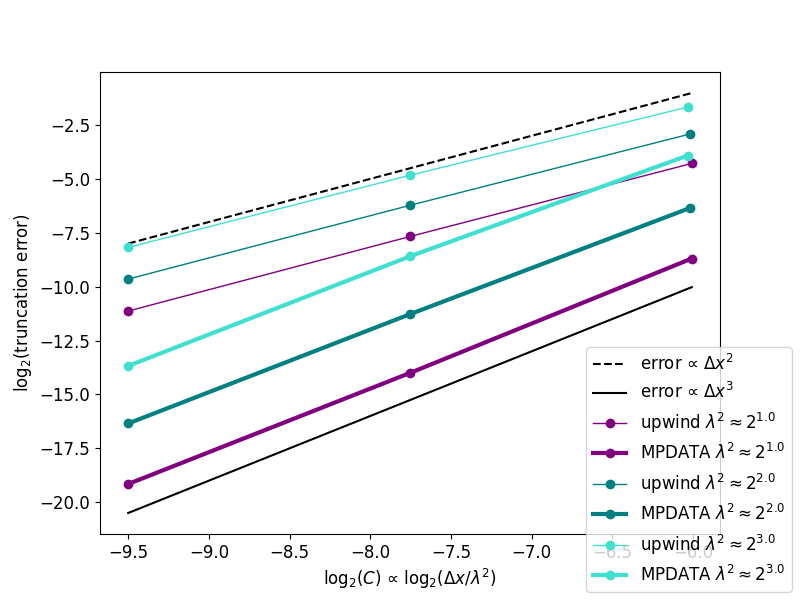

In [14]:
fig, ax = pyplot.subplots()
x = np.array(next(iter(data_C_err.values()))[0])
ax.plot(x, 2*x+11, '--', label="error ∝ $Δx^2$", color='black')
ax.plot(x, 3*x+8, label="error ∝ $Δx^3$", color='black')
i=0
for key, value in data_C_err.items():
    ax.plot(
        *value, 
        marker='o', 
        label=key, 
        linewidth=1 if key.startswith("upwind") else 3,
        color=colors[i//2]
    )
    i += 1
ax.set_xlabel("log$_2(C)$ ∝ log$_2(Δx/λ^2)$")
ax.set_ylabel("log$_2$(truncation error)")
fig.legend(loc='lower right')
fig.show()

In [15]:
upwind_1st_order_convergence_rate = 2
for key, value in data_C_err.items():
    if key.startswith("upwind"):
        x, y = value[0], value[1]
        slope = np.diff(y) / np.diff(x)
        np.testing.assert_almost_equal(np.mean(slope), 2, 1)

In [16]:
mpdata_almost_2nd_order_convergence_rate = 2.8
for key, value in data_C_err.items():
    if key.startswith("MPDATA"):
        x, y = value[0], value[1]
        slope = np.diff(y) / np.diff(x)
        assert np.mean(slope) >= 2.8